# <span style="color:blue"> Numerical Simulation Laboratory (NSL) </span>
    
##  <span style="color:blue"> Edoardo Baraldi - Notebook 10 </span>  

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 10 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 10, is characterized by a different temperature or a limited set of temperatures (if you need more than 10 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

### Exercise 10.2

Apply your parallel code to the TSP problem for 50 american state-capitals longitude and latitude coordinates in the *American_capitals.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

## Not Communicating

In [67]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math

plt.rcParams.update({'font.size': 21})
plt.rcParams["figure.figsize"]= (11,7)

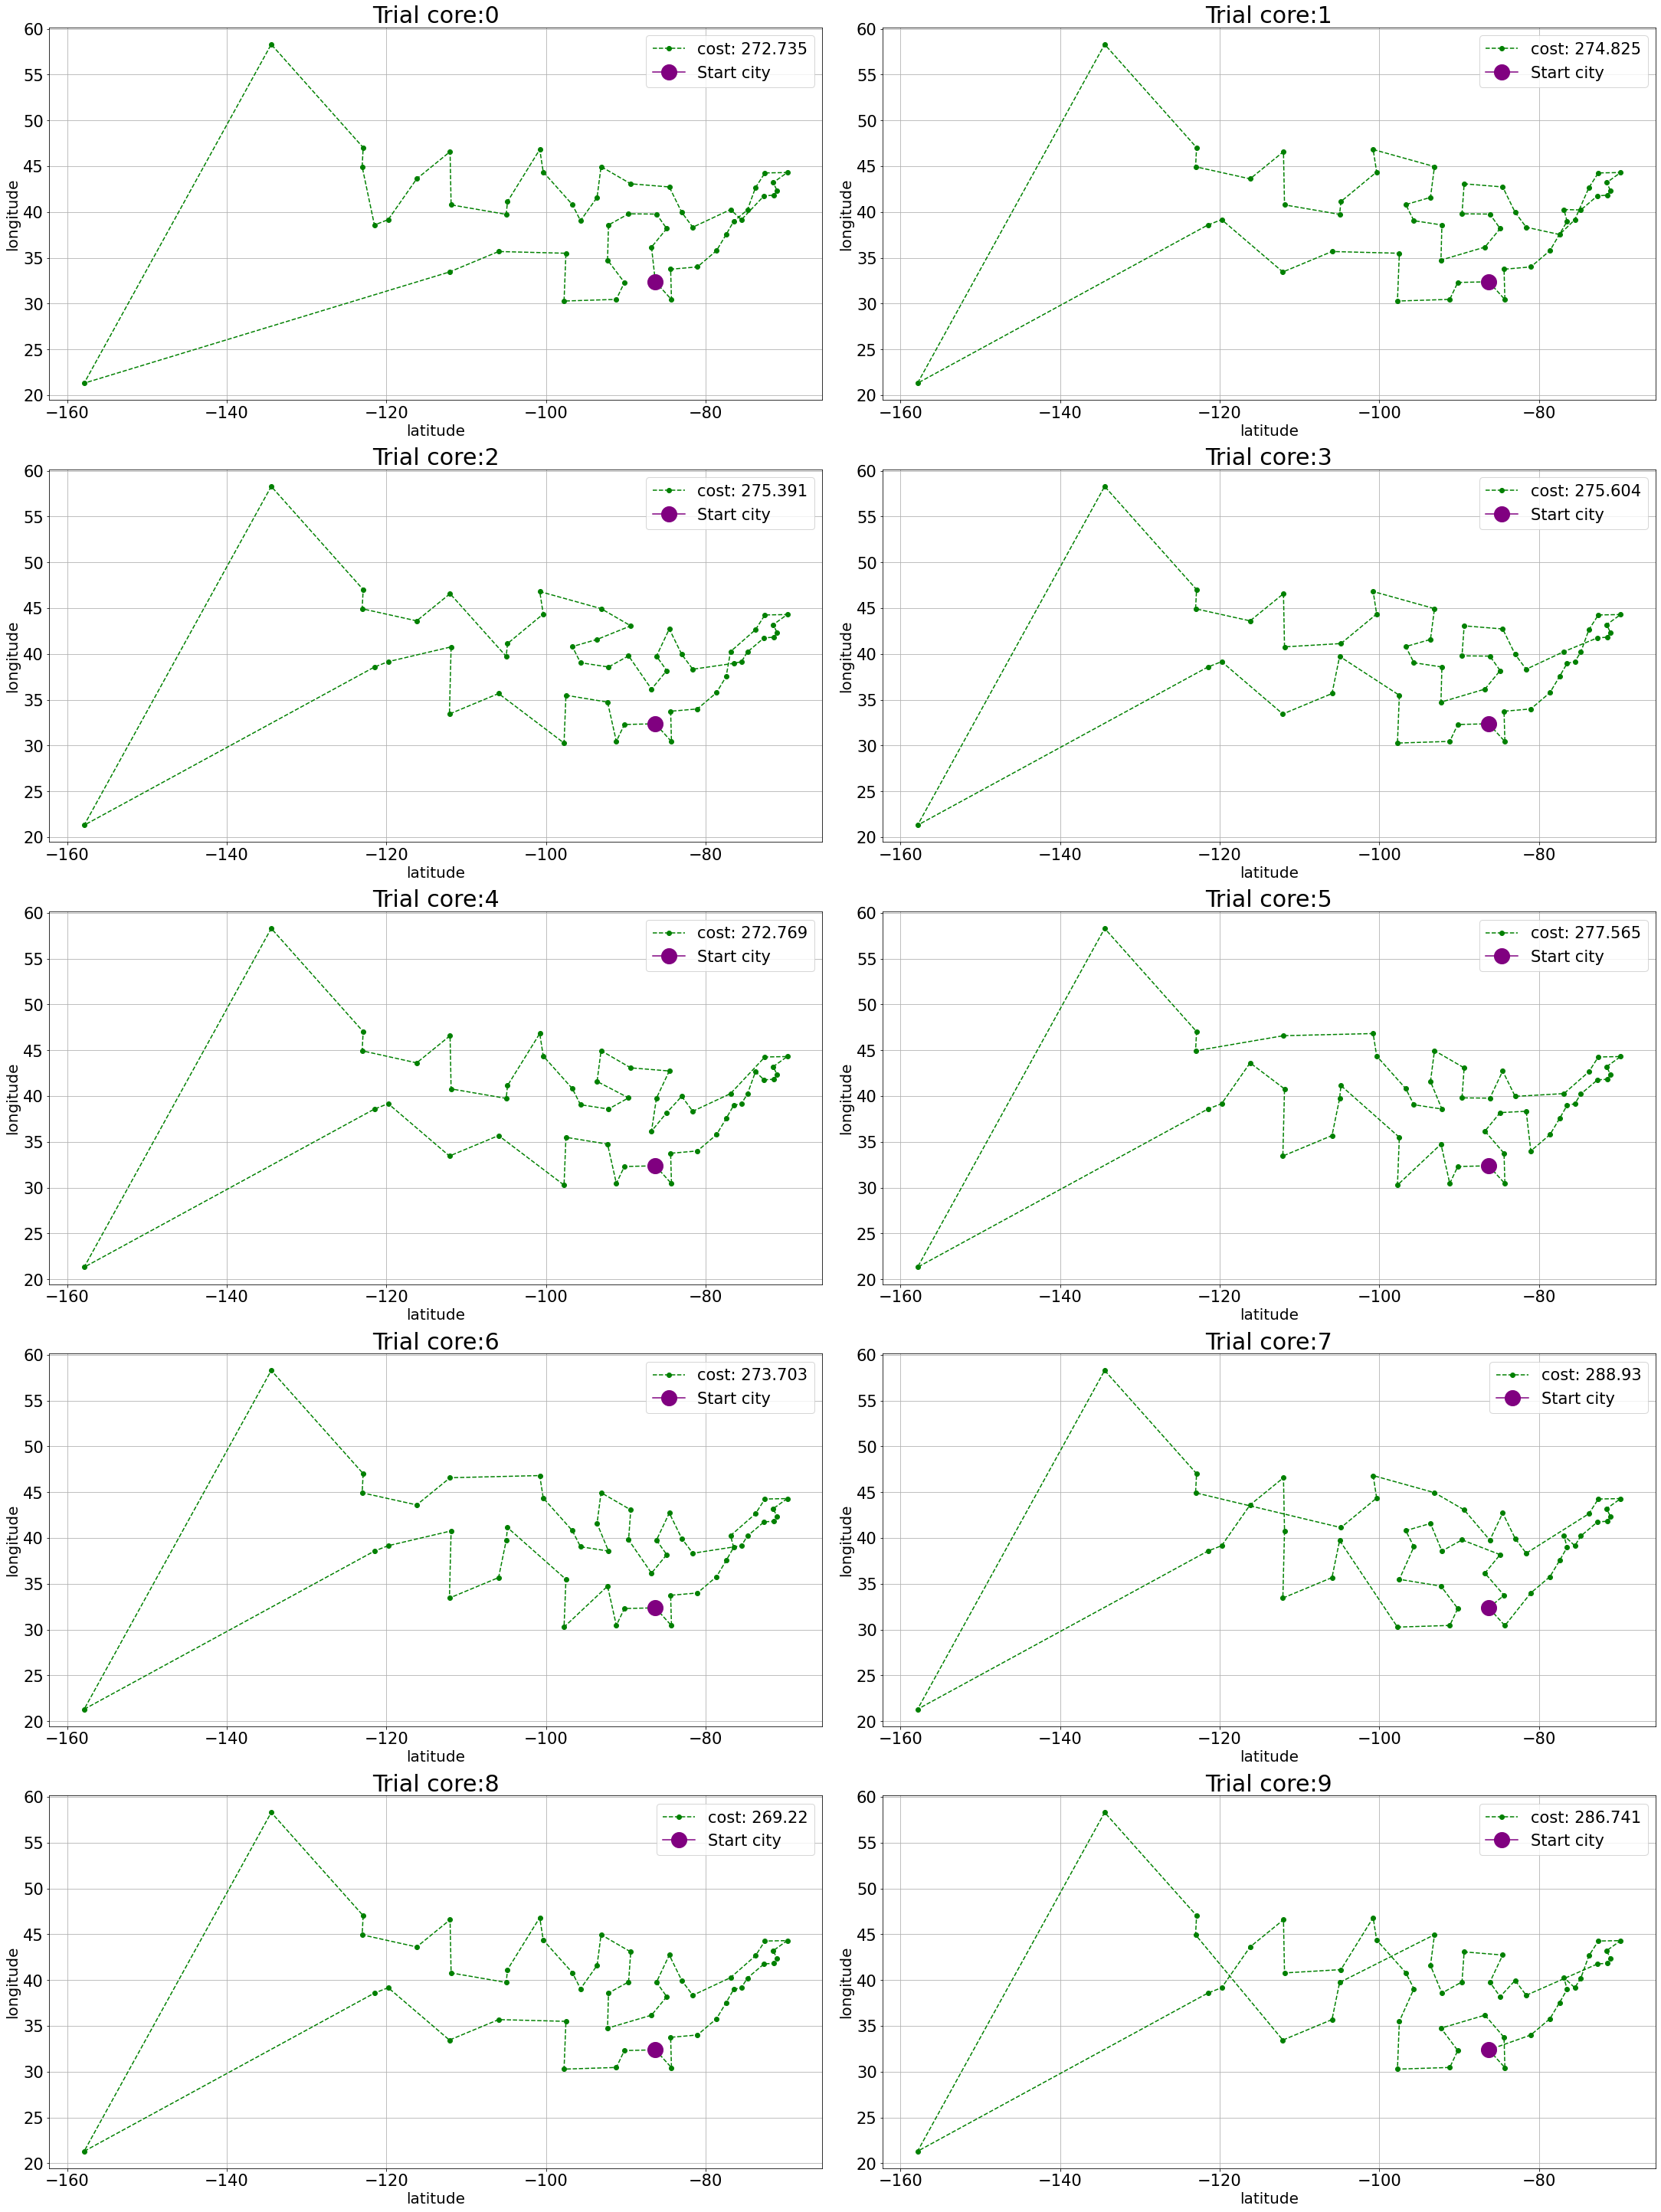

In [68]:
cost0, x0, y0 = np.loadtxt("not_comunitating/best_city_rank0nc.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost1, x1, y1 = np.loadtxt("not_comunitating/best_city_rank1nc.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost2, x2, y2 = np.loadtxt("not_comunitating/best_city_rank2nc.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost3, x3, y3 = np.loadtxt("not_comunitating/best_city_rank3nc.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost4, x4, y4 = np.loadtxt("not_comunitating/best_city_rank4nc.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost5, x5, y5 = np.loadtxt("not_comunitating/best_city_rank5nc.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost6, x6, y6 = np.loadtxt("not_comunitating/best_city_rank6nc.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost7, x7, y7 = np.loadtxt("not_comunitating/best_city_rank7nc.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost8, x8, y8 = np.loadtxt("not_comunitating/best_city_rank8nc.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost9, x9, y9 = np.loadtxt("not_comunitating/best_city_rank9nc.data", unpack=True, usecols=(0,2,3), delimiter=",")

costs=[np.mean(cost0), np.mean(cost1), np.mean(cost2), np.mean(cost3), np.mean(cost4), np.mean(cost5), np.mean(cost6), np.mean(cost7), np.mean(cost8), np.mean(cost9)]

fig, ax  = plt.subplots(5, 2, figsize=(30, 40), constrained_layout = True)

ax[0,0].plot(x0,y0, linestyle="--", marker="o", color = "green")
ax[0,0].plot(x0[0],y0[0], marker="o", color = "purple", markersize=20)
ax[0,1].plot(x1,y1, linestyle="--", marker="o", color = "green")
ax[0,1].plot(x1[0],y1[0], marker="o", color = "purple", markersize=20)
ax[1,0].plot(x2,y2, linestyle="--", marker="o", color = "green")
ax[1,0].plot(x2[0],y2[0], marker="o", color = "purple", markersize=20)
ax[1,1].plot(x3,y3, linestyle="--", marker="o", color = "green")
ax[1,1].plot(x3[0],y3[0], marker="o", color = "purple", markersize=20)
ax[2,0].plot(x4,y4, linestyle="--", marker="o", color = "green")
ax[2,0].plot(x4[0],y4[0], marker="o", color = "purple", markersize=20)
ax[2,1].plot(x5,y5, linestyle="--", marker="o", color = "green")
ax[2,1].plot(x5[0],y5[0], marker="o", color = "purple", markersize=20)
ax[3,0].plot(x6,y6, linestyle="--", marker="o", color = "green")
ax[3,0].plot(x6[0],y6[0], marker="o", color = "purple", markersize=20)
ax[3,1].plot(x7,y7, linestyle="--", marker="o", color = "green")
ax[3,1].plot(x7[0],y7[0], marker="o", color = "purple", markersize=20)
ax[4,0].plot(x8,y8, linestyle="--", marker="o", color = "green")
ax[4,0].plot(x8[0],y8[0], marker="o", color = "purple", markersize=20)
ax[4,1].plot(x9,y9, linestyle="--", marker="o", color = "green")
ax[4,1].plot(x9[0],y9[0], marker="o", color = "purple", markersize=20)

for i in range (2):
    for j in range (5):
        ax[j,i].grid()
        ax[j,i].set_xlabel("latitude", fontsize=20)
        ax[j,i].set_ylabel("longitude", fontsize=20)
        ax[j,i].legend(["cost: " + str(round(costs[2*j+i],3)), "Start city"] )
        ax[j,i].set_title("Trial core:" + str(2*j+i), fontsize=30)

I grafici mostrano i migliori percorsi trovati parallelizzando l'algoritmo di ottimizzazione genetica per 10 processi e applicandolo alla posizione di 50 città americane. L'algoritmo utilizzato è esattamente lo stesso del Esercizio 9 in cui però ho variato il numero di gnerazioni su cui ho fatto evolvere la popolazione fissandolo a $30000$ e impostando che per ogni generazione potevano avvenire $50$ possibili modifiche dei cromosomi. Avendo un totale di 50 citta ho deciso di creare ungenoma composta da $300$ induividui in cui cercare il minimo della funzione costo. Quest'ultima è pari alla funzione $L^{(1)}$ del Esercizio 9: 

$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$

Ho svolto il processo di ottimizzazione in parallelo su 10 core diversi completamente indipendenti l'uno dall'altro in questa fase. Per differenziare i risultati ottenuti ho fatto in modo che ogni core partisse da un seed differente nel inizializzare il generatore di numeri casuali.
I risultati ottenuti sono differenti tra loro ma la funzione costo finale risulta essere sempre intorno a $270$.Fra tutti i valori ottenuti, il costo del cre n°8 è quello minore di tutti. Tuttavia non si ha la certezza che questo sia il minimo assoluto del costo per il problema del commesso viaggiatore su 50 citta americane.

Un'ultima osservazione riguarda il calcolo delle distanze tra le città che nel mio algoritmo non tiene conto della sfericità della terra.

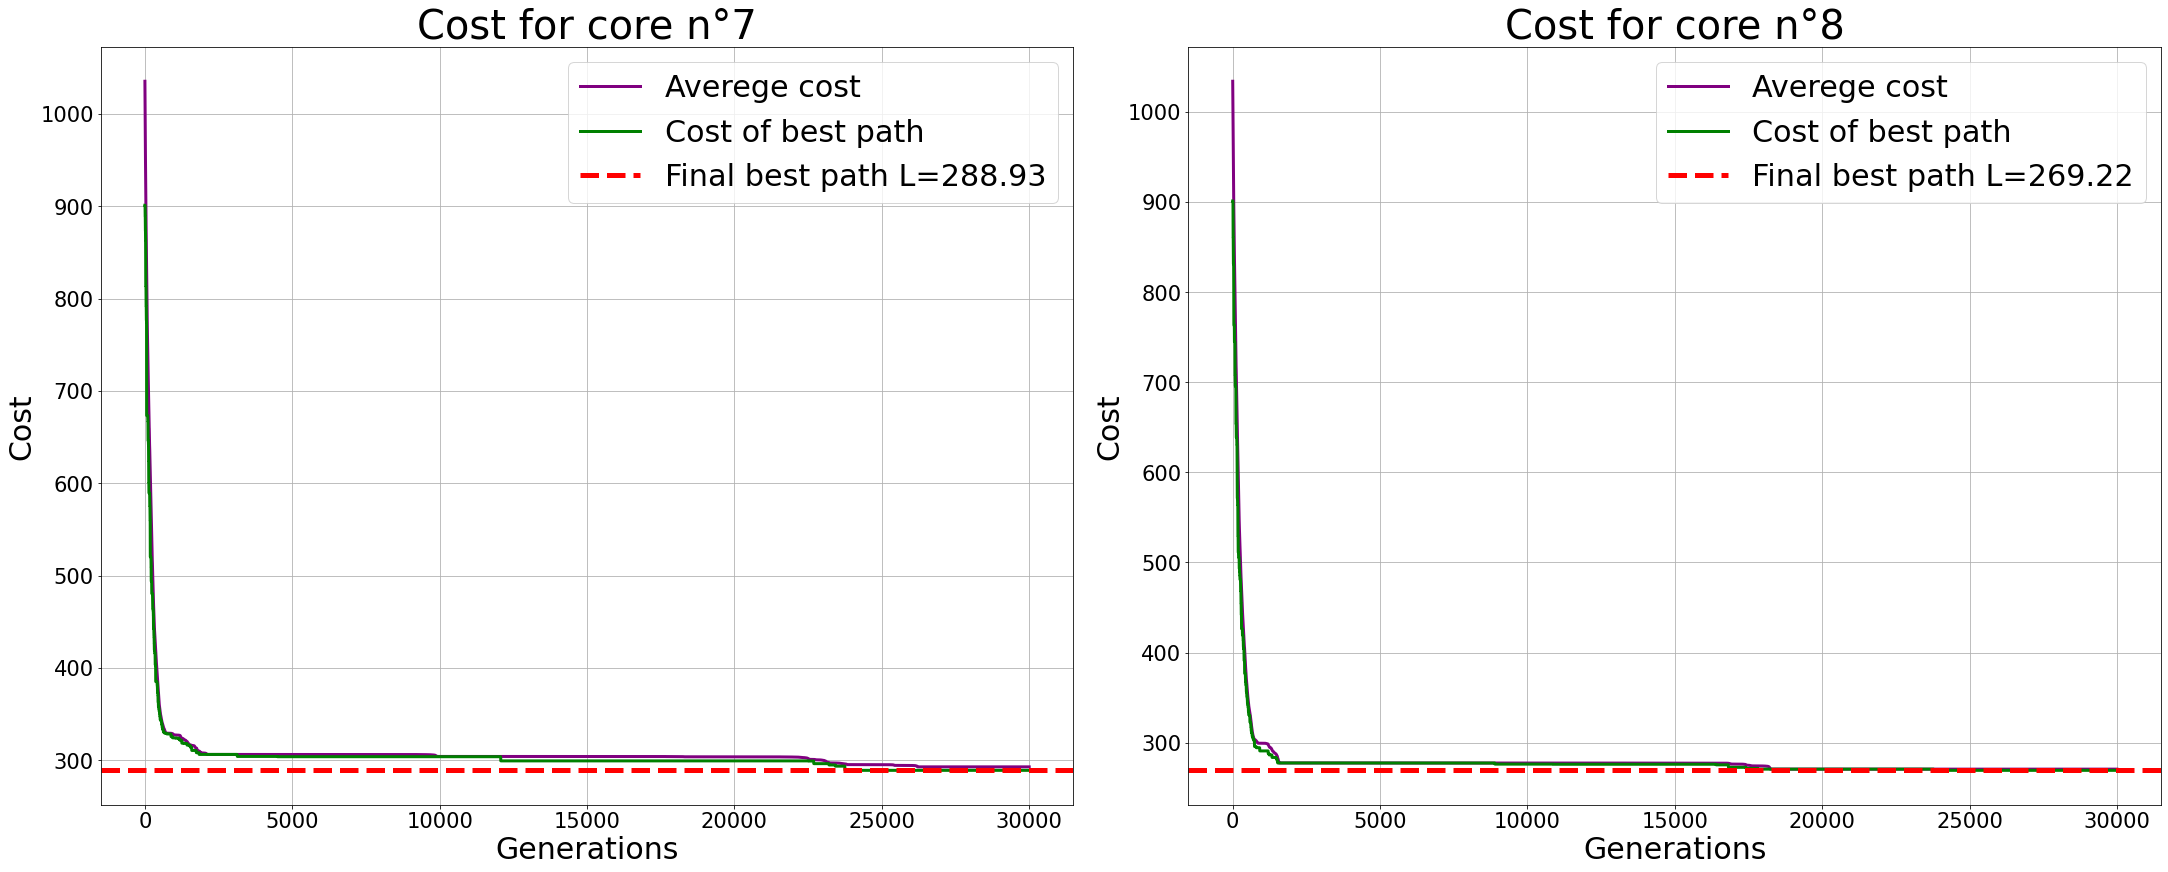

In [69]:
generations_7, L_best_7, half_L_best_7, err_h_L_7 = np.loadtxt("not_comunitating/cities_rank7nc.data", unpack=True, usecols=(0,1,2,3), delimiter=",")
generations_8, L_best_8, half_L_best_8, err_h_L_8 = np.loadtxt("not_comunitating/cities_rank8nc.data", unpack=True, usecols=(0,1,2,3), delimiter=",")

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(30, 12), constrained_layout = True)

ax0.plot(generations_7, half_L_best_7, color="purple", label='Averege cost', linewidth=3)
ax0.plot(generations_7, L_best_7, color="green", label='Cost of best path', linewidth=3)
ax0.axhline(L_best_7[-1], label='Final best path L='+str(L_best_7[-1]), color='red', linestyle='--',linewidth=5)
ax0.set_ylabel(r'Cost', fontsize=30)
ax0.set_xlabel(r'Generations', fontsize=30)
ax0.grid(True)
ax0.set_title(r'Cost for core n°7',fontsize=40)
ax0.legend(loc=1, fontsize="x-large")

ax1.plot(generations_8, half_L_best_8, color="purple", label='Averege cost', linewidth=3)
ax1.plot(generations_8, L_best_8, color="green", label='Cost of best path', linewidth=3)
ax1.axhline(L_best_8[-1], label='Final best path L='+str(L_best_8[-1]), color='red', linestyle='--',linewidth=5)
ax1.set_ylabel(r'Cost', fontsize=30)
ax1.set_xlabel(r'Generations', fontsize=30)
ax1.grid(True)
ax1.set_title(r'Cost for core n°8',fontsize=40)
ax1.legend(loc=1, fontsize="x-large")

plt.show()

Sono mostrati in alto i grafici dell'andamento della funzione costo per il peggiore ed il migliore risultato trovati nel processo di ottimizzazione del problema del commesso vaggiatore, in funzione delle generazioni di evoluzione. In entrambi i casi si vede come già dopo $25000$ generazioni sia il costo medio, sia il costo del miglior tragitto saturano verso un valore. 

L'uso di diversi processi in parallelo (in questo 10) per detemrniare il costo ottimizzato consente di esplorare meglio lo spazio dei parametri che descrivono il problema. La parallelizzazione quindi risulta molto utile in problemi piuù complessi di quello affrontato in questo esercizio, come quello del Esercio 8.

## Communicating 

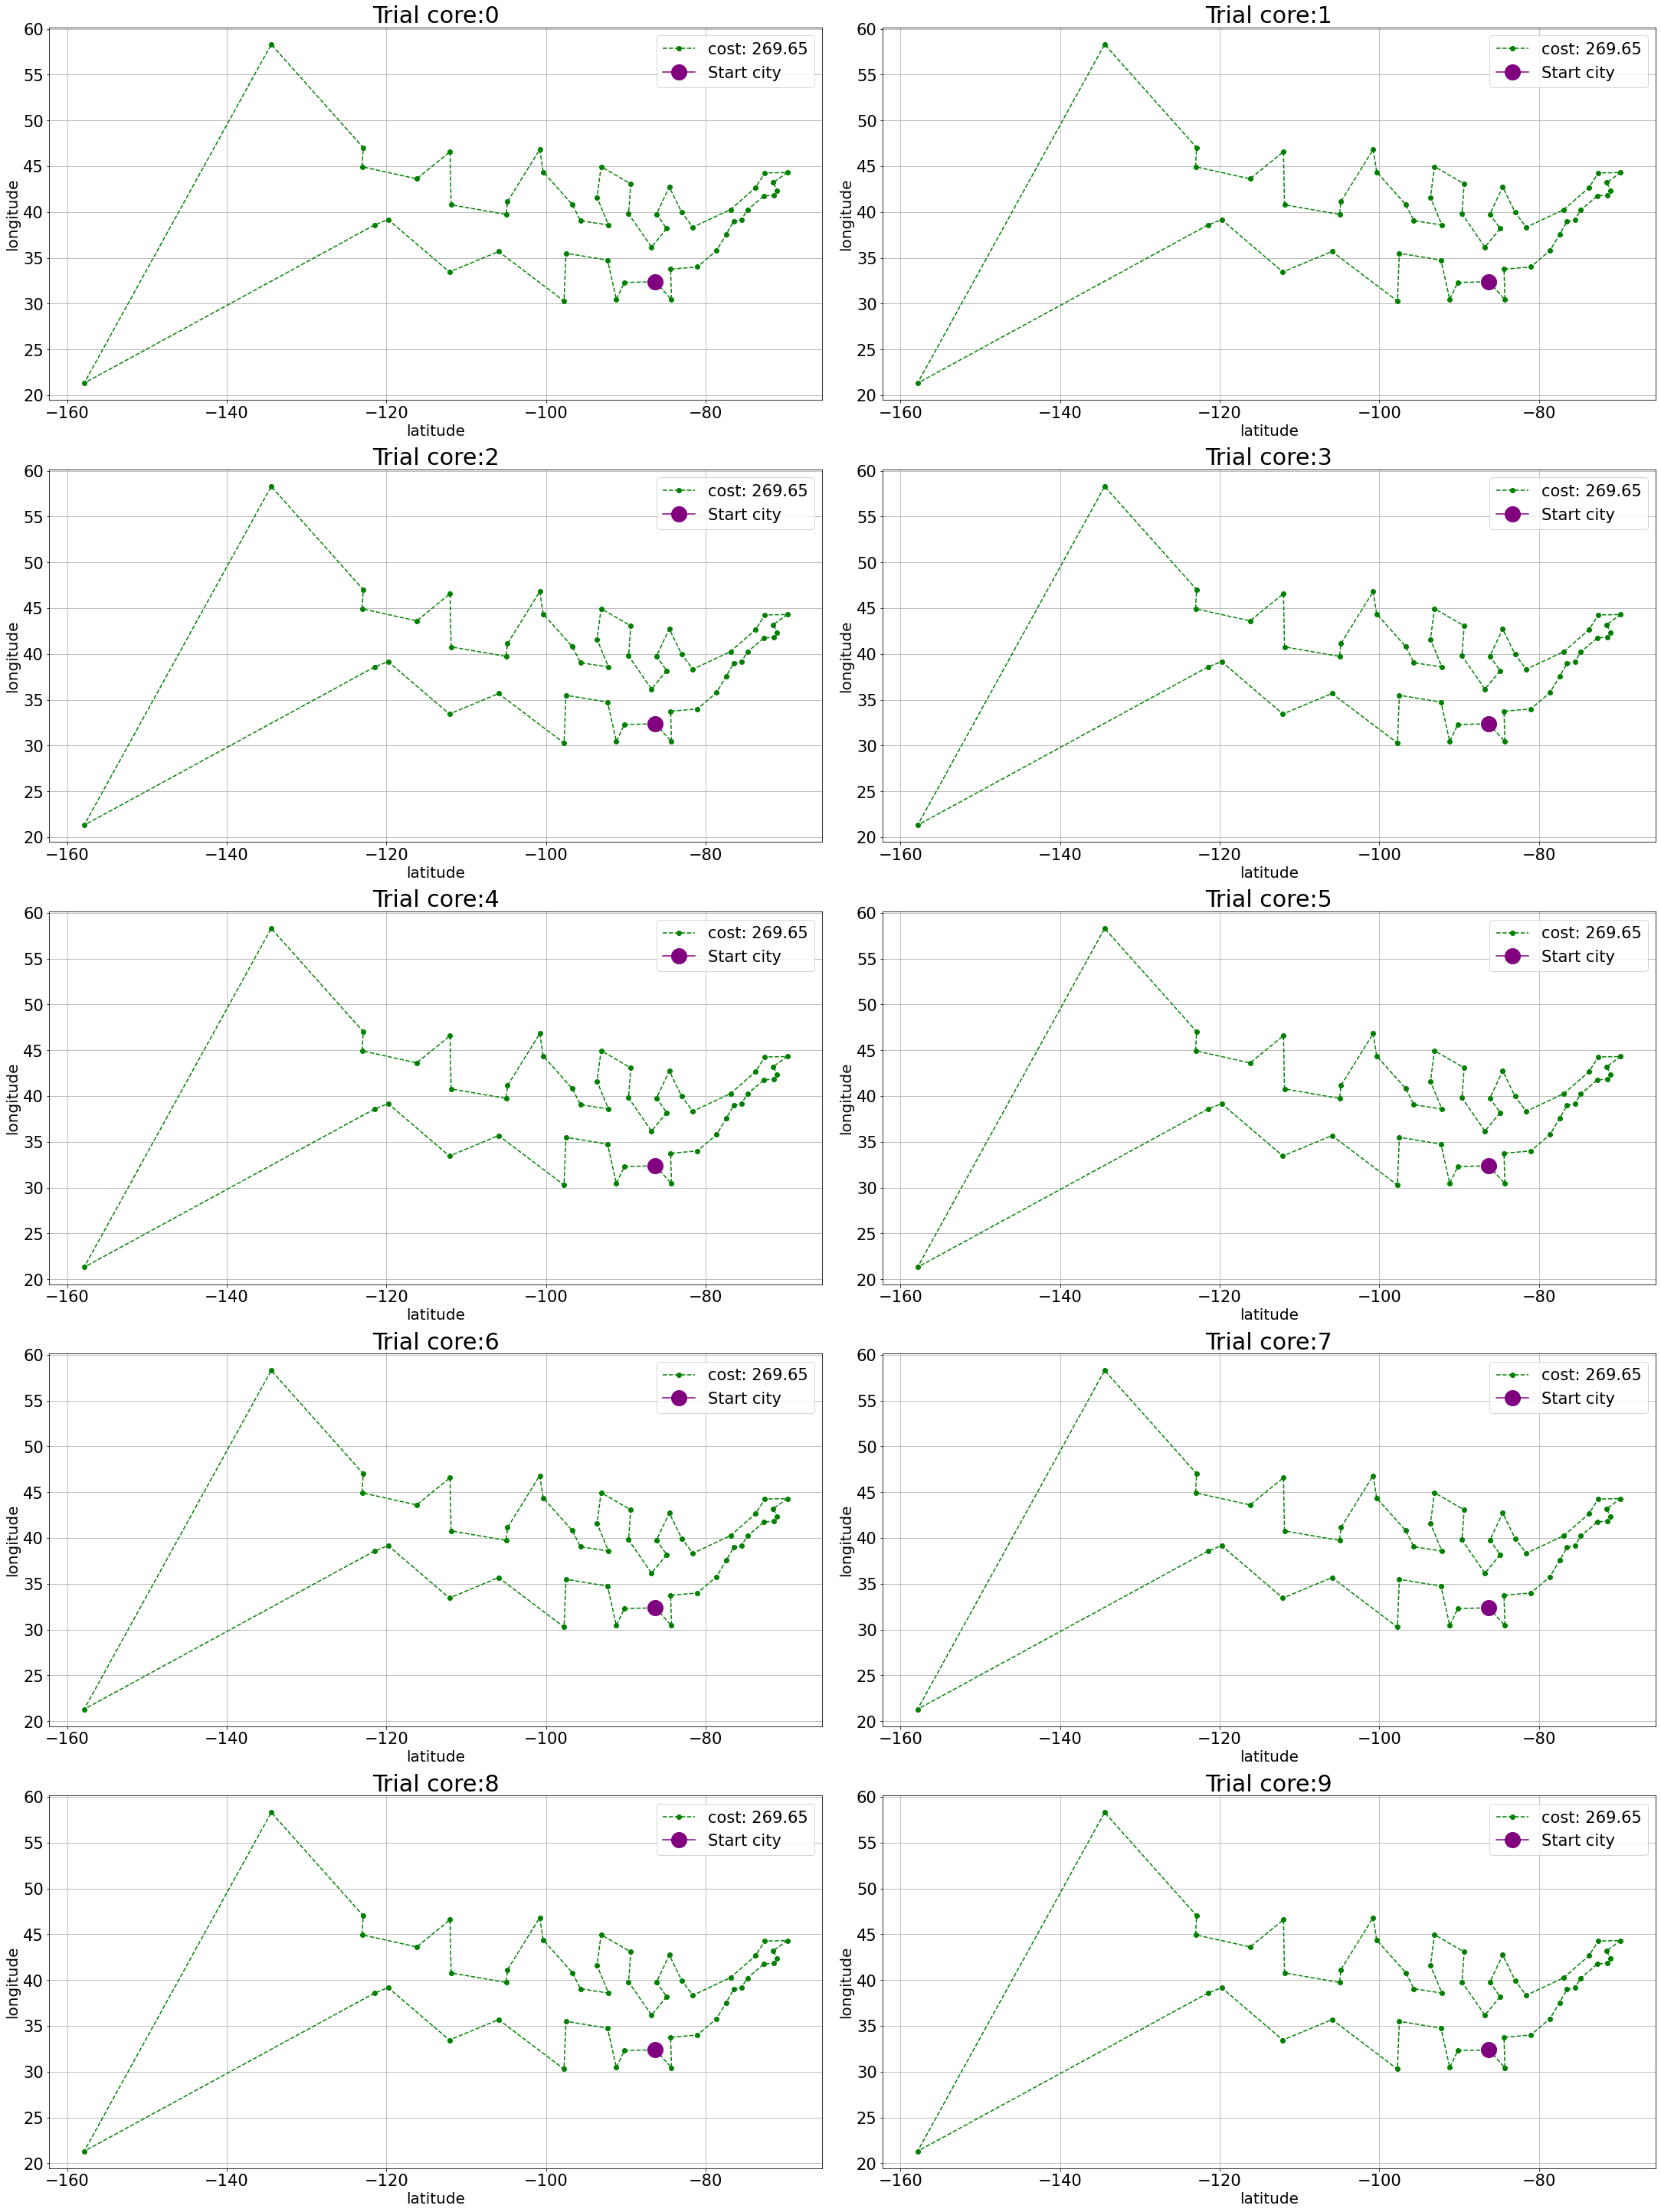

In [70]:
cost0, x0, y0 = np.loadtxt("communicating/best_city_rank0c.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost1, x1, y1 = np.loadtxt("communicating/best_city_rank1c.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost2, x2, y2 = np.loadtxt("communicating/best_city_rank2c.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost3, x3, y3 = np.loadtxt("communicating/best_city_rank3c.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost4, x4, y4 = np.loadtxt("communicating/best_city_rank4c.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost5, x5, y5 = np.loadtxt("communicating/best_city_rank5c.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost6, x6, y6 = np.loadtxt("communicating/best_city_rank6c.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost7, x7, y7 = np.loadtxt("communicating/best_city_rank7c.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost8, x8, y8 = np.loadtxt("communicating/best_city_rank8c.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost9, x9, y9 = np.loadtxt("communicating/best_city_rank9c.data", unpack=True, usecols=(0,2,3), delimiter=",")

costs=[np.mean(cost0), np.mean(cost1), np.mean(cost2), np.mean(cost3), np.mean(cost4), np.mean(cost5), np.mean(cost6), np.mean(cost7), np.mean(cost8), np.mean(cost9)]

fig, ax  = plt.subplots(5, 2, figsize=(30, 40), constrained_layout = True)

ax[0,0].plot(x0,y0, linestyle="--", marker="o", color = "green")
ax[0,0].plot(x0[0],y0[0], marker="o", color = "purple", markersize=20)
ax[0,1].plot(x1,y1, linestyle="--", marker="o", color = "green")
ax[0,1].plot(x1[0],y1[0], marker="o", color = "purple", markersize=20)
ax[1,0].plot(x2,y2, linestyle="--", marker="o", color = "green")
ax[1,0].plot(x2[0],y2[0], marker="o", color = "purple", markersize=20)
ax[1,1].plot(x3,y3, linestyle="--", marker="o", color = "green")
ax[1,1].plot(x3[0],y3[0], marker="o", color = "purple", markersize=20)
ax[2,0].plot(x4,y4, linestyle="--", marker="o", color = "green")
ax[2,0].plot(x4[0],y4[0], marker="o", color = "purple", markersize=20)
ax[2,1].plot(x5,y5, linestyle="--", marker="o", color = "green")
ax[2,1].plot(x5[0],y5[0], marker="o", color = "purple", markersize=20)
ax[3,0].plot(x6,y6, linestyle="--", marker="o", color = "green")
ax[3,0].plot(x6[0],y6[0], marker="o", color = "purple", markersize=20)
ax[3,1].plot(x7,y7, linestyle="--", marker="o", color = "green")
ax[3,1].plot(x7[0],y7[0], marker="o", color = "purple", markersize=20)
ax[4,0].plot(x8,y8, linestyle="--", marker="o", color = "green")
ax[4,0].plot(x8[0],y8[0], marker="o", color = "purple", markersize=20)
ax[4,1].plot(x9,y9, linestyle="--", marker="o", color = "green")
ax[4,1].plot(x9[0],y9[0], marker="o", color = "purple", markersize=20)

for i in range (2):
    for j in range (5):
        ax[j,i].grid()
        ax[j,i].set_xlabel("latitude", fontsize=20)
        ax[j,i].set_ylabel("longitude", fontsize=20)
        ax[j,i].legend(["cost: " + str(round(costs[2*j+i],2)), "Start city"] )
        ax[j,i].set_title("Trial core:" + str(2*j+i), fontsize=30)

Ho proceduto a modificare il codice usato nel punto precedente per far comunicare i 10 core utilizzati tra di loro. La comunicazione è avvenuta ad ogni $100$ generazione e constiste nel raccogliere i migliori percorsi da ogni processo in parallelo (continente), nel core principale, in modo tale da mischiarli e ridistribuirli randomicamente. Questo tipo di comunicazione è molto forte e fa si che alla fine delle $30000$ generazioni di evoluzioni ogni processo sviluppi lo stesso tipo di tragitto ottimizzato che non necessariamente coincide con il migliore tragitto possibile. Infatti il costo riultante $L=269.65$ è differente dal migliore risultato ottenuto per i 10 core non cumnicanti: $L=269.22$. 

Fa comunicare così spesso un gran numero di core non permette di eplorare completamente lo spazio dei parametri descriventi il problema e con un approccio del genere, per problemi complessi, risulta facile finire in un minimo locale.

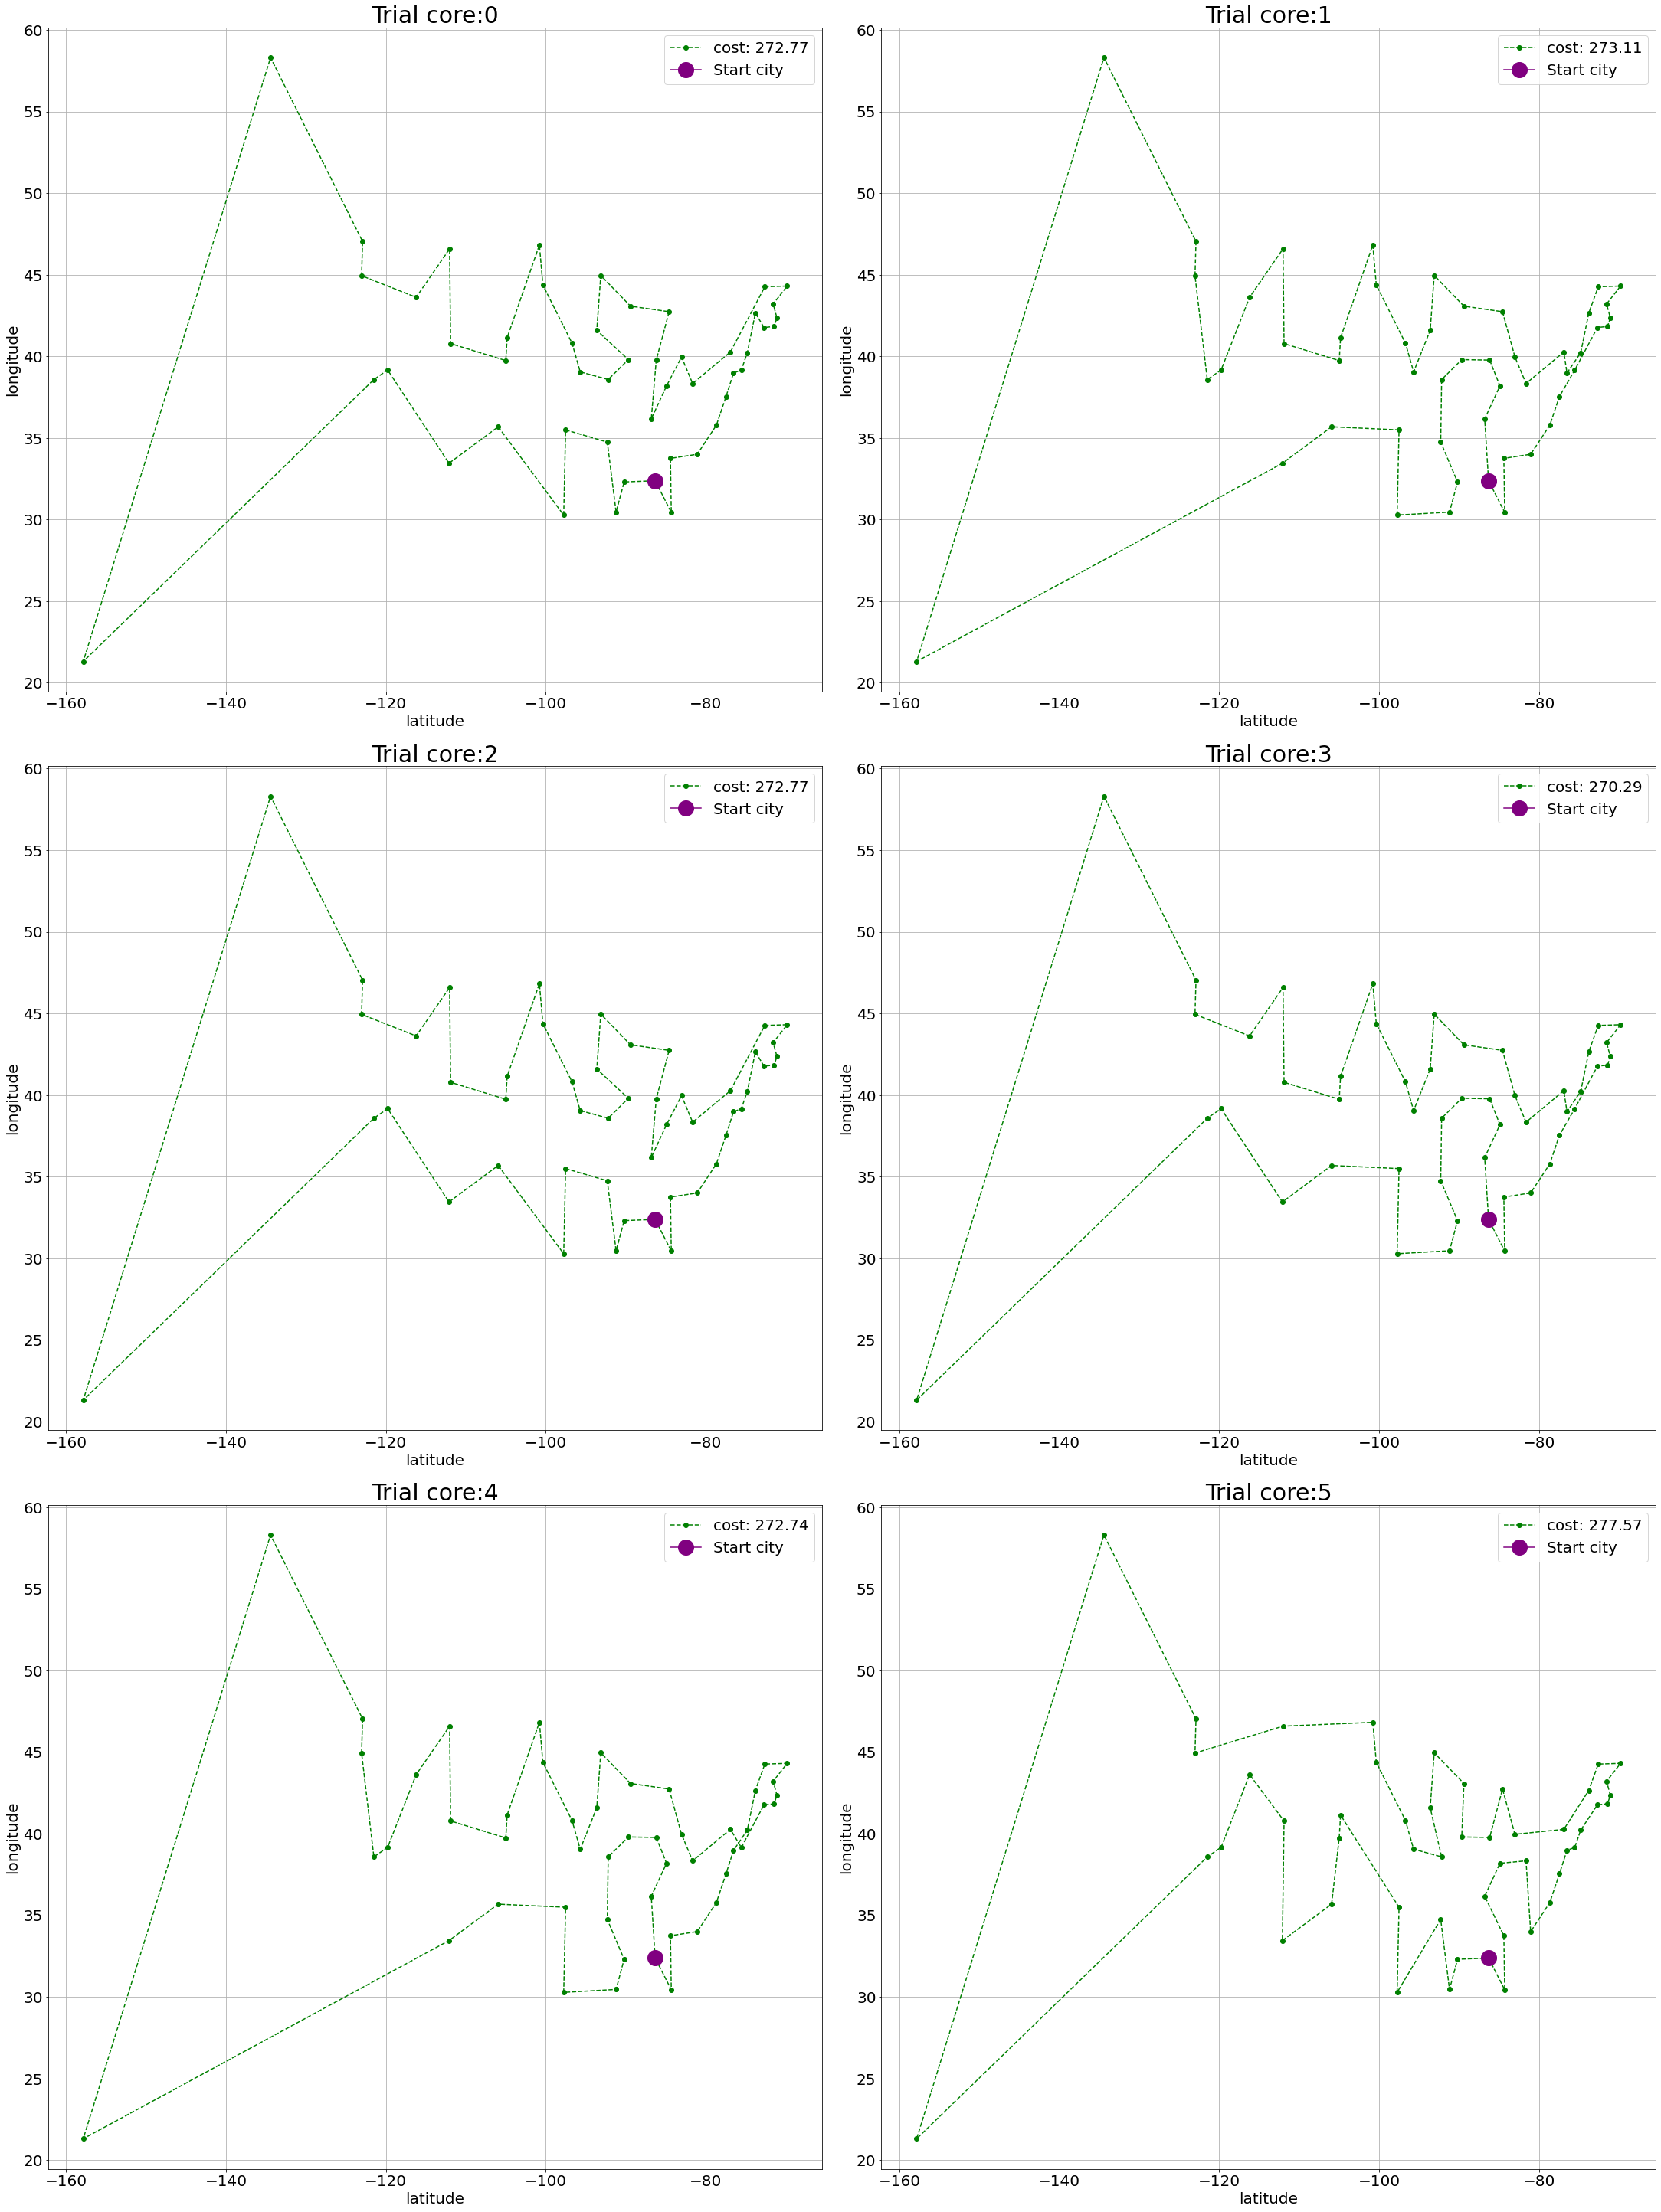

In [74]:
cost0, x0, y0 = np.loadtxt("less_communicating/best_city_rank0lc.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost1, x1, y1 = np.loadtxt("less_communicating/best_city_rank1lc.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost2, x2, y2 = np.loadtxt("less_communicating/best_city_rank2lc.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost3, x3, y3 = np.loadtxt("less_communicating/best_city_rank3lc.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost4, x4, y4 = np.loadtxt("less_communicating/best_city_rank4lc.data", unpack=True, usecols=(0,2,3), delimiter=",")
cost5, x5, y5 = np.loadtxt("less_communicating/best_city_rank5lc.data", unpack=True, usecols=(0,2,3), delimiter=",")

costs=[np.mean(cost0), np.mean(cost1), np.mean(cost2), np.mean(cost3), np.mean(cost4), np.mean(cost5) ]

fig, ax  = plt.subplots(3, 2, figsize=(30, 40), constrained_layout = True)

ax[0,0].plot(x0,y0, linestyle="--", marker="o", color = "green")
ax[0,0].plot(x0[0],y0[0], marker="o", color = "purple", markersize=20)
ax[0,1].plot(x1,y1, linestyle="--", marker="o", color = "green")
ax[0,1].plot(x1[0],y1[0], marker="o", color = "purple", markersize=20)
ax[1,0].plot(x2,y2, linestyle="--", marker="o", color = "green")
ax[1,0].plot(x2[0],y2[0], marker="o", color = "purple", markersize=20)
ax[1,1].plot(x3,y3, linestyle="--", marker="o", color = "green")
ax[1,1].plot(x3[0],y3[0], marker="o", color = "purple", markersize=20)
ax[2,0].plot(x4,y4, linestyle="--", marker="o", color = "green")
ax[2,0].plot(x4[0],y4[0], marker="o", color = "purple", markersize=20)
ax[2,1].plot(x5,y5, linestyle="--", marker="o", color = "green")
ax[2,1].plot(x5[0],y5[0], marker="o", color = "purple", markersize=20)


for i in range (2):
    for j in range (3):
        ax[j,i].grid()
        ax[j,i].set_xlabel("latitude", fontsize=20)
        ax[j,i].set_ylabel("longitude", fontsize=20)
        ax[j,i].legend(["cost: " + str(round(costs[2*j+i],2)), "Start city"] )
        ax[j,i].set_title("Trial core:" + str(2*j+i), fontsize=30)
        
plt.show()

Ho riproposto l'ottimizzazione usando processi in parallelo comunicanti ma ho impostato una cominicazione più rara. Ogni continte comunicava con gli altri solo dopo $10000$ gnerazioni. Avendo impostato in totale quindi $30000$ generazioni, la comunicazione è avvenuta solo 3 volte. Per di più ho diminuiti a 6 il numero di core utilizzati. 
I costi ottenuti sono diversi tra loro ma quasi tutti intorno ad valore $L\sim270$, apparte l'ultimo. Non si è arrivati neanche qui ad un possibile minimo assoluto ma questo tipo di approccio risulta più efficace nell'esplorare in maniera diversa i valori dei parametri da ottimizzare nel problema.